In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries loaded successfully! ✓")

Libraries loaded successfully! ✓


In [11]:
df = pd.read_csv('../data/Space_Weather_Indices_Subset.csv')

print("Dataset loaded successfully! ✓")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully! ✓
Shape: 25 rows, 21 columns


In [12]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Time (UTC),minimum,0.25-quantile,median,0.75-quantile,maximum,prob 4-5,prob 5-6,prob 6-7,prob 7-8,...,kp_0,kp_1,kp_2,kp_3,kp_4,kp_5,kp_6,kp_7,kp_8,kp_9
0,12-11-2025 18:00,7.000000,7.000000,7.000000,7.000000,7.000000,0.0,0.0,1.0,1.0,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
1,12-11-2025 21:00,3.000000,4.333333,5.000000,5.666666,6.333333,0.3,0.5,0.1,0.0,...,5.000000,5.666666,5.333333,6.333333,3.000000,3.333333,4.666666,5.666666,4.333333,5.333333
2,13-11-2025 00:00,3.000000,3.333333,4.333333,5.000000,7.666666,0.5,0.4,0.0,0.1,...,4.333333,5.333333,5.000000,5.000000,3.000000,3.333333,3.000000,7.666666,5.000000,4.000000
3,13-11-2025 03:00,2.333333,4.333333,4.333333,6.333333,8.000000,0.4,0.1,0.2,0.1,...,2.333333,6.666666,6.333333,5.666666,4.333333,4.333333,2.666666,8.000000,4.666666,4.333333
4,13-11-2025 06:00,2.333333,4.000000,4.333333,6.333333,7.000000,0.4,0.2,0.4,0.1,...,4.000000,6.333333,5.666666,6.333333,4.333333,6.000000,2.333333,7.000000,4.333333,4.000000


In [13]:
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time (UTC)     25 non-null     object 
 1   minimum        25 non-null     float64
 2   0.25-quantile  25 non-null     float64
 3   median         25 non-null     float64
 4   0.75-quantile  25 non-null     float64
 5   maximum        25 non-null     float64
 6   prob 4-5       25 non-null     float64
 7   prob 5-6       25 non-null     float64
 8   prob 6-7       25 non-null     float64
 9   prob 7-8       25 non-null     float64
 10  prob >= 8      25 non-null     float64
 11  kp_0           25 non-null     float64
 12  kp_1           25 non-null     float64
 13  kp_2           25 non-null     float64
 14  kp_3           25 non-null     float64
 15  kp_4           25 non-null     float64
 16  kp_5           25 non-null     float64
 17  kp_6           25 non-null     floa

In [14]:
print("\nMissing Values:")
print("="*50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])


Missing Values:
✓ No missing values found!


In [15]:
print("Statistical Summary:")
print("="*50)
df.describe()

Statistical Summary:


,minimum,0.25-quantile,median,0.75-quantile,maximum,prob 4-5,prob 5-6,prob 6-7,prob 7-8,prob >= 8,kp_0,kp_1,kp_2,kp_3,kp_4,kp_5,kp_6,kp_7,kp_8,kp_9
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.666666,2.573333,2.986666,3.760000,5.013333,0.204000,0.080000,0.100000,0.056000,0.004,3.373333,4.013333,3.706666,3.026666,2.826666,2.626666,2.653333,4.680000,2.173333,2.946666
std,1.370996,1.460974,1.538036,1.631632,1.495301,0.188149,0.144338,0.225462,0.200167,0.020,1.593738,1.628678,1.754149,2.127683,1.569737,1.555516,1.160619,1.617268,1.735042,1.591878
min,0.666666,1.000000,1.333333,2.000000,3.333333,0.000000,0.000000,0.000000,0.000000,0.000,1.666666,2.333333,1.333333,0.666666,1.333333,1.333333,1.000000,3.000000,0.666666,1.000000
25%,1.000000,1.333333,1.666666,2.333333,3.666666,0.000000,0.000000,0.000000,0.000000,0.000,2.000000,2.666666,1.666666,1.000000,1.333333,1.666666,2.000000,3.666666,1.000000,1.333333
50%,1.000000,2.333333,2.333333,3.000000,4.666666,0.200000,0.000000,0.000000,0.000000,0.000,3.000000,3.333333,4.333333,2.333333,2.333333,2.000000,2.666666,4.000000,1.333333,2.666666
75%,2.333333,3.333333,4.333333,5.000000,6.333333,0.400000,0.100000,0.100000,0.000000,0.000,4.333333,5.333333,5.000000,4.666666,4.333333,3.333333,3.000000,6.333333,3.333333,4.333333
max,7.000000,7.000000,7.000000,7.000000,8.000000,0.500000,0.500000,1.000000,1.000000,0.100,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000


In [16]:
df['Time (UTC)'] = pd.to_datetime(df['Time (UTC)'], format='%d-%m-%Y %H:%M')

print("✓ Time column converted to datetime format")
print(f"Date range: {df['Time (UTC)'].min()} to {df['Time (UTC)'].max()}")

✓ Time column converted to datetime format
Date range: 2025-11-12 18:00:00 to 2025-11-15 18:00:00


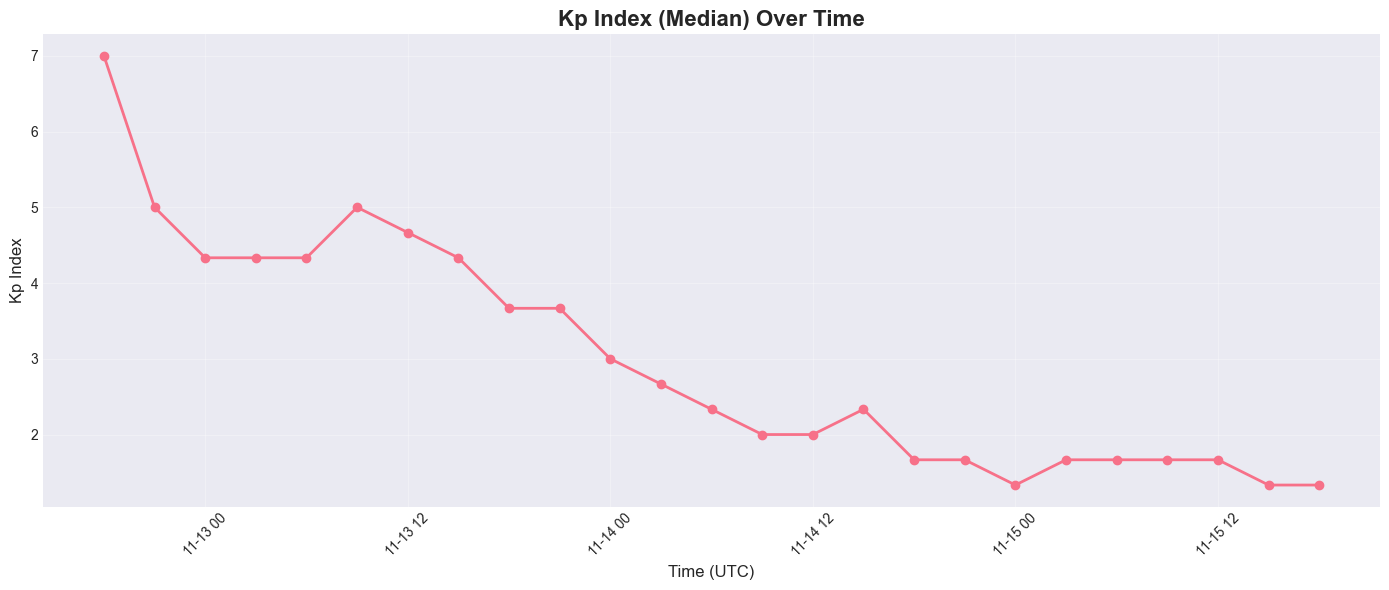

Notice the spike on 12-11-2025 at 18:00 where Kp reached 7.0!


In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df['Time (UTC)'], df['median'], marker='o', linestyle='-', linewidth=2)
plt.title('Kp Index (Median) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Kp Index', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Notice the spike on 12-11-2025 at 18:00 where Kp reached 7.0!")

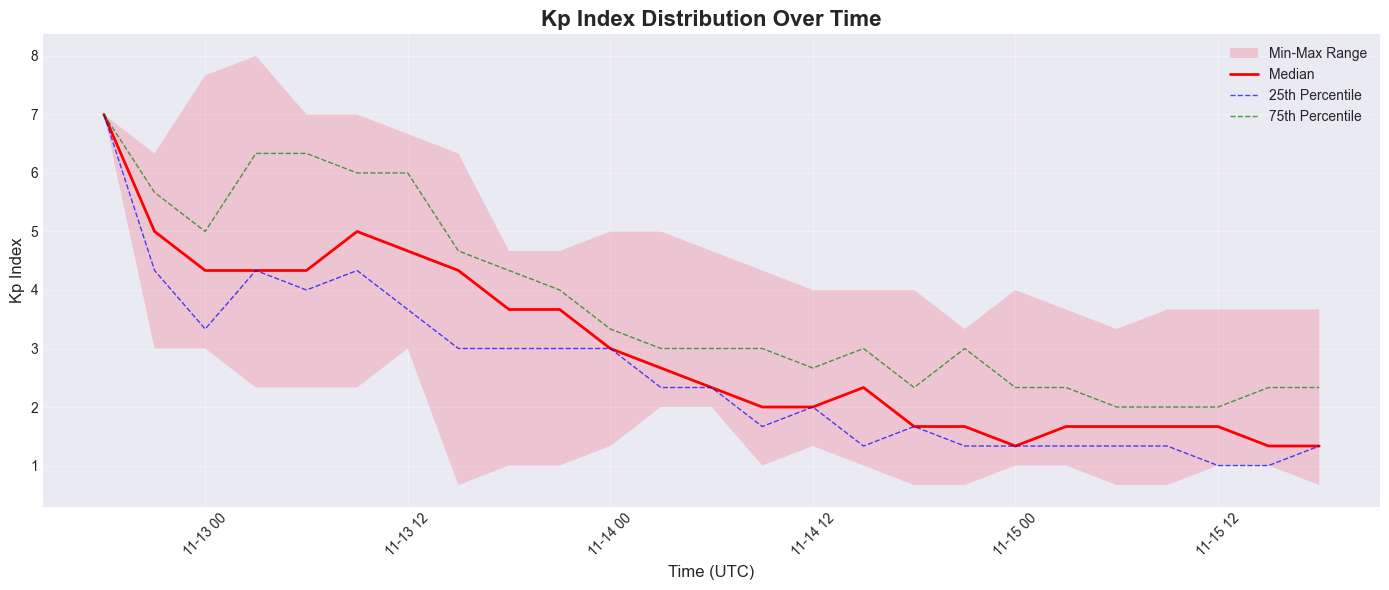

In [18]:
plt.figure(figsize=(14, 6))
plt.fill_between(df['Time (UTC)'], df['minimum'], df['maximum'], alpha=0.3, label='Min-Max Range')
plt.plot(df['Time (UTC)'], df['median'], color='red', linewidth=2, label='Median')
plt.plot(df['Time (UTC)'], df['0.25-quantile'], color='blue', linewidth=1, linestyle='--', alpha=0.7, label='25th Percentile')
plt.plot(df['Time (UTC)'], df['0.75-quantile'], color='green', linewidth=1, linestyle='--', alpha=0.7, label='75th Percentile')

plt.title('Kp Index Distribution Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Kp Index', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

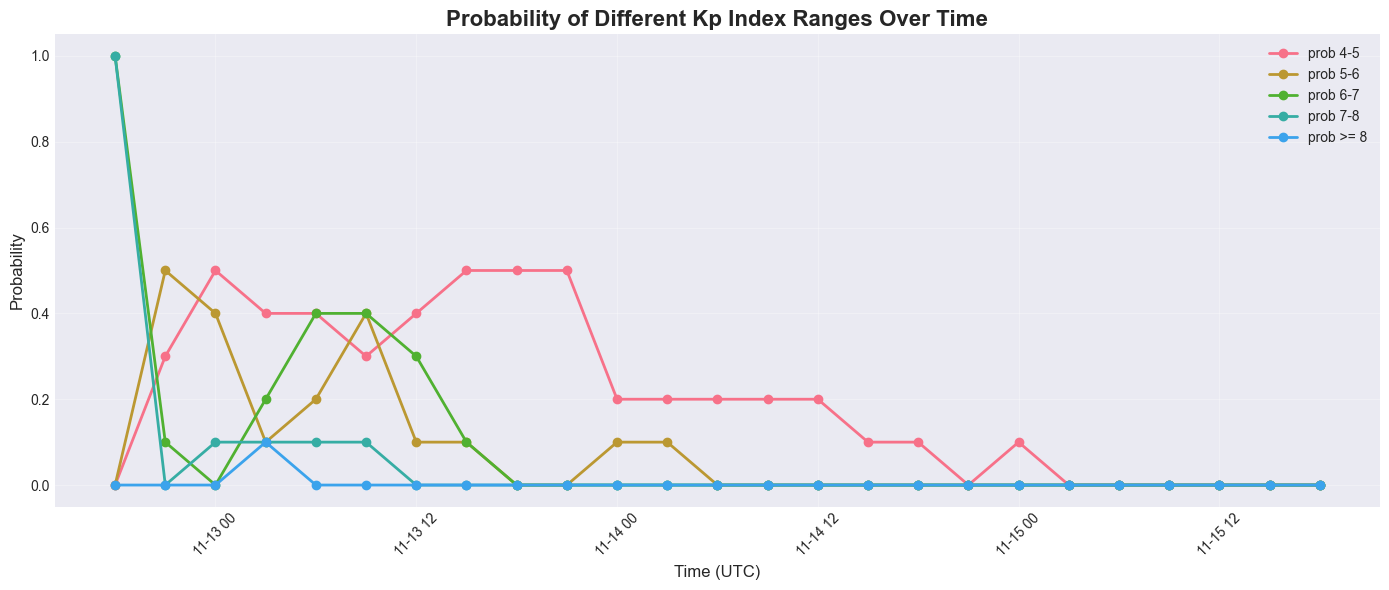

In [19]:
prob_cols = ['prob 4-5', 'prob 5-6', 'prob 6-7', 'prob 7-8', 'prob >= 8']

plt.figure(figsize=(14, 6))
for col in prob_cols:
    plt.plot(df['Time (UTC)'], df[col], marker='o', linestyle='-', label=col, linewidth=2)

plt.title('Probability of Different Kp Index Ranges Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print("\n" + "="*60)
print("KEY FINDINGS FROM EXPLORATORY ANALYSIS")
print("="*60)

print(f"\n1. Dataset covers {(df['Time (UTC)'].max() - df['Time (UTC)'].min()).days} days")
print(f"   from {df['Time (UTC)'].min()} to {df['Time (UTC)'].max()}")

print(f"\n2. Kp Index Statistics:")
print(f"   - Highest median value: {df['median'].max()}")
print(f"   - Lowest median value: {df['median'].min()}")
print(f"   - Average median value: {df['median'].mean():.2f}")

print(f"\n3. Storm Activity:")
high_activity = df[df['median'] >= 5]
print(f"   - {len(high_activity)} time periods with Kp ≥ 5 (moderate storm)")
print(f"   - That's {len(high_activity)/len(df)*100:.1f}% of the time period")

print(f"\n4. Extreme Event:")
extreme = df[df['median'] == df['median'].max()]
print(f"   - Maximum Kp occurred at: {extreme['Time (UTC)'].values[0]}")
print(f"   - Value: {extreme['median'].values[0]}")

print("\n" + "="*60)


KEY FINDINGS FROM EXPLORATORY ANALYSIS

1. Dataset covers 3 days
   from 2025-11-12 18:00:00 to 2025-11-15 18:00:00

2. Kp Index Statistics:
   - Highest median value: 7.0
   - Lowest median value: 1.333333
   - Average median value: 2.99

3. Storm Activity:
   - 3 time periods with Kp ≥ 5 (moderate storm)
   - That's 12.0% of the time period

4. Extreme Event:
   - Maximum Kp occurred at: 2025-11-12T18:00:00.000000000
   - Value: 7.0



In [21]:
print("\n📋 SUGGESTED NEXT STEPS:")
print("="*60)
print("1. Add more datasets (solar wind, GOES X-ray flux)")
print("2. Correlate high Kp events with technology disruptions")
print("3. Create time-series forecasting models")
print("4. Analyze seasonal patterns in space weather")
print("5. Build an alert system for extreme events")
print("="*60)


📋 SUGGESTED NEXT STEPS:
1. Add more datasets (solar wind, GOES X-ray flux)
2. Correlate high Kp events with technology disruptions
3. Create time-series forecasting models
4. Analyze seasonal patterns in space weather
5. Build an alert system for extreme events


In [22]:
import os

# Create folders for outputs
os.makedirs('../outputs/figures', exist_ok=True)
os.makedirs('../outputs/results', exist_ok=True)

print("✓ Output folders created!")

✓ Output folders created!


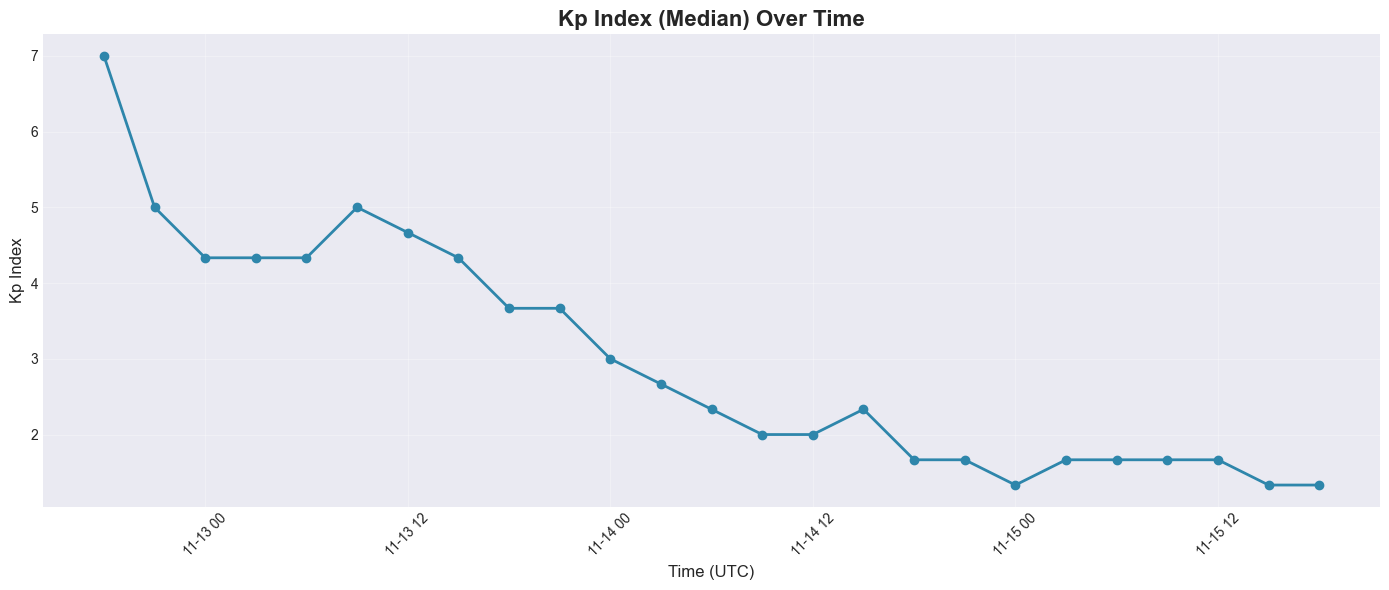

✓ Saved: 01_kp_index_timeseries.png


In [23]:
# Recreate and save the Kp Index plot
plt.figure(figsize=(14, 6))
plt.plot(df['Time (UTC)'], df['median'], marker='o', linestyle='-', linewidth=2, color='#2E86AB')
plt.title('Kp Index (Median) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Kp Index', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('../outputs/figures/01_kp_index_timeseries.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

print("✓ Saved: 01_kp_index_timeseries.png")

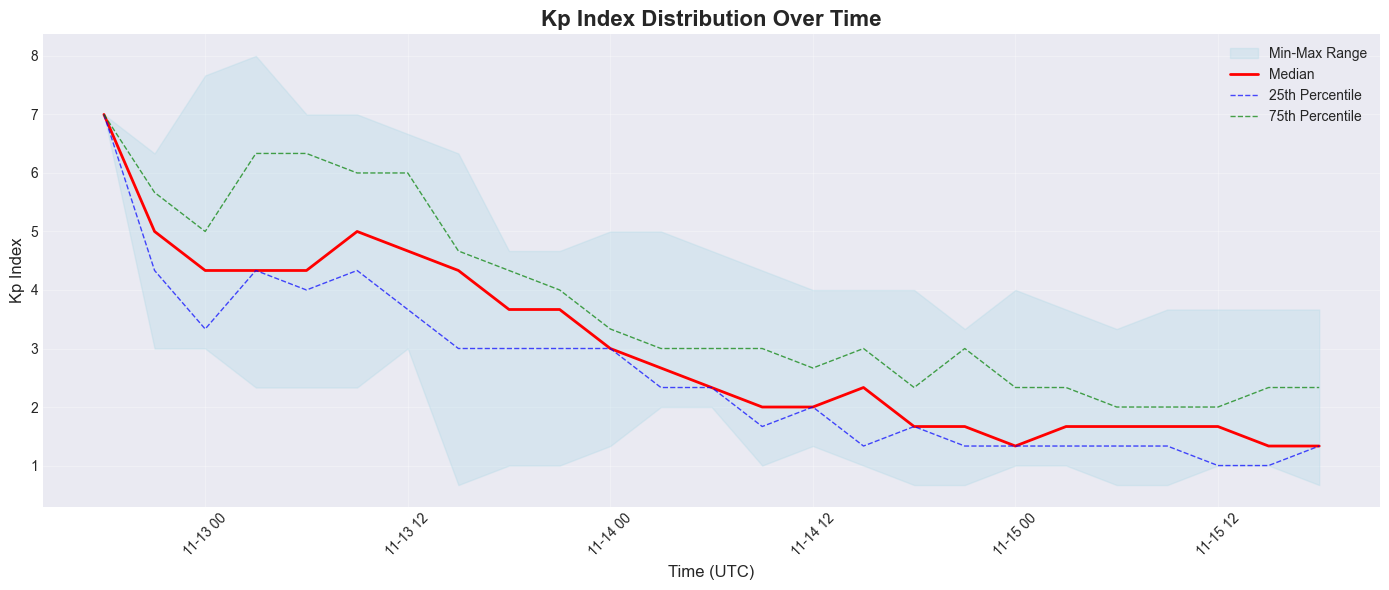

✓ Saved: 02_kp_distribution.png


In [24]:
# Recreate and save the distribution plot
plt.figure(figsize=(14, 6))
plt.fill_between(df['Time (UTC)'], df['minimum'], df['maximum'], 
                 alpha=0.3, label='Min-Max Range', color='lightblue')
plt.plot(df['Time (UTC)'], df['median'], color='red', linewidth=2, label='Median')
plt.plot(df['Time (UTC)'], df['0.25-quantile'], color='blue', 
         linewidth=1, linestyle='--', alpha=0.7, label='25th Percentile')
plt.plot(df['Time (UTC)'], df['0.75-quantile'], color='green', 
         linewidth=1, linestyle='--', alpha=0.7, label='75th Percentile')

plt.title('Kp Index Distribution Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Kp Index', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../outputs/figures/02_kp_distribution.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

print("✓ Saved: 02_kp_distribution.png")

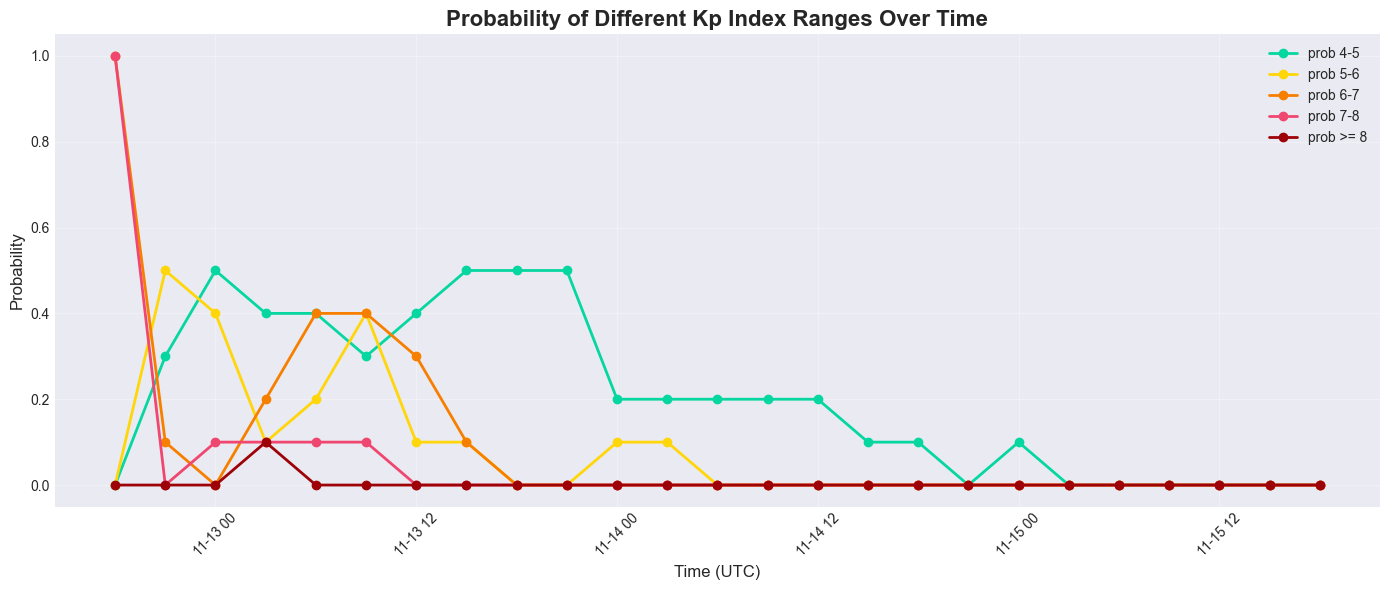

✓ Saved: 03_probability_analysis.png


In [25]:
# Recreate and save probability plot
prob_cols = ['prob 4-5', 'prob 5-6', 'prob 6-7', 'prob 7-8', 'prob >= 8']

plt.figure(figsize=(14, 6))
colors = ['#06D6A0', '#FFD60A', '#F77F00', '#EF476F', '#9D0208']

for col, color in zip(prob_cols, colors):
    plt.plot(df['Time (UTC)'], df[col], marker='o', linestyle='-', 
             label=col, linewidth=2, color=color)

plt.title('Probability of Different Kp Index Ranges Over Time', 
          fontsize=16, fontweight='bold')
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../outputs/figures/03_probability_analysis.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

print("✓ Saved: 03_probability_analysis.png")

In [26]:
# Create and save summary statistics
summary_stats = pd.DataFrame({
    'Metric': ['Total Time Periods', 'Date Range (Days)', 'Highest Kp', 
               'Lowest Kp', 'Average Kp', 'Moderate Storm Events (Kp≥5)',
               'Severe Storm Events (Kp≥6)', 'Extreme Storm Events (Kp≥7)'],
    'Value': [
        len(df),
        (df['Time (UTC)'].max() - df['Time (UTC)'].min()).days,
        df['median'].max(),
        df['median'].min(),
        round(df['median'].mean(), 2),
        len(df[df['median'] >= 5]),
        len(df[df['median'] >= 6]),
        len(df[df['median'] >= 7])
    ]
})

# Save to CSV
summary_stats.to_csv('../outputs/results/summary_statistics.csv', index=False)

print("\n" + "="*60)
print("SUMMARY STATISTICS SAVED")
print("="*60)
print(summary_stats.to_string(index=False))
print("\n✓ Saved: summary_statistics.csv")


SUMMARY STATISTICS SAVED
                      Metric     Value
          Total Time Periods 25.000000
           Date Range (Days)  3.000000
                  Highest Kp  7.000000
                   Lowest Kp  1.333333
                  Average Kp  2.990000
Moderate Storm Events (Kp≥5)  3.000000
  Severe Storm Events (Kp≥6)  1.000000
 Extreme Storm Events (Kp≥7)  1.000000

✓ Saved: summary_statistics.csv


In [9]:
print("\n" + "🎉"*30)
print("\n✅ ALL VISUALIZATIONS AND RESULTS EXPORTED SUCCESSFULLY!")
print("\n📁 Check these folders:")
print("   - outputs/figures/     (3 high-quality PNG images)")
print("   - outputs/results/     (summary statistics CSV)")
print("\n" + "🎉"*30)


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉

✅ ALL VISUALIZATIONS AND RESULTS EXPORTED SUCCESSFULLY!

📁 Check these folders:
   - outputs/figures/     (3 high-quality PNG images)
   - outputs/results/     (summary statistics CSV)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
